# Using EDHEC Risk Kit Part 1
### Explore use of the library to calculate:
- annualized returns
- annualized volatility
- drawdown at each timestep
- max drawdown
- semideviation of returns distribution
- skewness of returns distribution
- kurtosis of returns distribution

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk

### Retrieve the monthly returns for 49 industries from 1960 to 2018

In [6]:
df = erk.get_ind_returns(n_inds=49)['1960':]

### For the next few statistics, consider a portfolio holding a portfolio holding 100% Beer industry stocks

### Calculate the annualized return

In [9]:
erk.annualize_rets(df['Beer'], periods_per_year=12)

0.11920634382896678

### Calculate the annualized volatility

In [10]:
erk.annualize_vol(df['Beer'], periods_per_year=12)

0.17519063591781509

### Calculate the max drawdown

In [11]:
erk.drawdown(df['Beer'])['Drawdown'].min()*-1

0.5855330578251526

### What month did max drawdown occur?

In [13]:
erk.drawdown(df['Beer'])['Drawdown'].idxmin()

Period('1974-12', 'M')

### What was it's semideviation?

(Standard deviavation among subset negative asset returns)

In [19]:
erk.semideviation(df['Beer'])

0.03417051008448179

### Conditional Value at Risk (CVaR)

In [20]:
erk.cvar_historic(df['Beer'], level=5)

0.10638611111111114

### Sharpe Ratio

In [24]:
erk.sharpe_ratio(df['Beer'], riskfree_rate=0.02, periods_per_year=12)

0.5559722618022646

### Skewness

Normal distributions have a skessness of 0

In [37]:
erk.skewness(df['Beer'])

-0.010471512193777247

### Kurtosis

Normal distributions have a kurtosis of 3

In [38]:
erk.kurtosis(df['Beer'])

5.446251021883774

### Do the monthly returns follow the normal distribution?

In [39]:
erk.is_normal(df['Beer'], level=0.01)

False

# Compare returns between industries
### Which industries had the highest and lowest annual returns?

In [17]:
ind_highest_ret = erk.annualize_rets(df, periods_per_year=12).idxmax()
ind_lowest_ret = erk.annualize_rets(df, periods_per_year=12).idxmin()
print('Industry with highest annualized return: {0}'.format(ind_highest_ret))
print('Industry with lowest annualized return: {0}'.format(ind_lowest_ret))

Industry with highest annualized return: Smoke
Industry with lowest annualized return: Steel


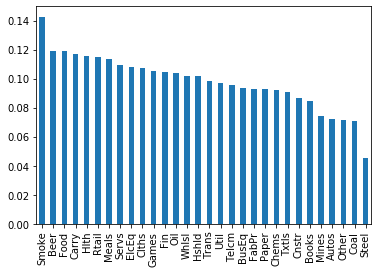

In [34]:
erk.annualize_rets(df, periods_per_year=12).sort_values(ascending=False).plot.bar()
plt.show()

### Which industry returns were most negatively skewed?

In [29]:
print(erk.skewness(df).idxmin())

Meals


### Which industry returns distributions had the highest kurtosis

In [40]:
print(erk.kurtosis(df).idxmax())

Txtls


### Display summary stats of all the industries

In [41]:
erk.summary_stats(df)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Food,0.118983,0.149425,0.010944,5.261846,0.058464,0.089978,0.579442,-0.502419
Beer,0.119206,0.175191,-0.010472,5.446251,0.070081,0.106386,0.495398,-0.585533
Smoke,0.142585,0.210531,-0.103832,5.398053,0.085722,0.125156,0.520244,-0.598755
Games,0.105586,0.247243,-0.267419,5.399089,0.108207,0.158553,0.297229,-0.769843
Books,0.084455,0.200166,-0.035562,5.467605,0.084236,0.122328,0.264533,-0.773244
Hshld,0.101864,0.162928,-0.292402,4.694151,0.070307,0.101906,0.429105,-0.574849
Clths,0.107625,0.219375,-0.068181,5.607062,0.091421,0.130592,0.344121,-0.762776
Hlth,0.115712,0.169800,0.021311,5.292478,0.067646,0.099408,0.491110,-0.470459
Chems,0.092195,0.189459,-0.120480,5.265948,0.080380,0.111681,0.319275,-0.583971
Txtls,0.091117,0.244169,0.392389,12.301449,0.084808,0.152728,0.243310,-0.779751
